In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
pd.set_option('display.max_colwidth', -1)

In [3]:
ed_country = pd.read_csv("~\Desktop\dss_sp19\EdStatsCountry.csv")

In [4]:
ed_data = pd.read_csv("~\Desktop\dss_sp19\EdStatsData.csv")

In [23]:
by_region = ed_country.sort_values("Region")[["Country Code", "Short Name", "Region", "Income Group"]]
south_asia = by_region[by_region["Region"] == "South Asia"]
south_asia

,Country Code,Short Name,Region,Income Group
30,BTN,Bhutan,South Asia,Lower middle income
126,LKA,Sri Lanka,South Asia,Lower middle income
98,IND,India,South Asia,Lower middle income
170,PAK,Pakistan,South Asia,Lower middle income
139,MDV,Maldives,South Asia,Upper middle income
165,NPL,Nepal,South Asia,Low income
18,BGD,Bangladesh,South Asia,Low income
1,AFG,Afghanistan,South Asia,Low income


In [48]:
india = countries_to_2017[countries_to_2017['Country Code'] == 'IND']
india = india.drop(columns=["Country Name", "Country Code", "Indicator Code"])
india_row_counts = india.apply(lambda x: x.count(), axis=1)
india['Row Count'] = india_row_counts
india = india[india['Row Count'] > 30]
india_w_row = india #with row count
india = india.drop(columns=["Row Count"]) #dropped row count column
india["Indicator Name"]

415278    Enrolment in Grade 1 of lower secondary general education, both sexes (number)                    
415279    Enrolment in Grade 1 of lower secondary general education, female (number)                        
415280    Enrolment in Grade 1 of primary education, both sexes (number)                                    
415281    Enrolment in Grade 1 of primary education, female (number)                                        
415296    Enrolment in Grade 5 of primary education, both sexes (number)                                    
415297    Enrolment in Grade 5 of primary education, female (number)                                        
415322    Enrolment in pre-primary education, both sexes (number)                                           
415323    Enrolment in pre-primary education, female (number)                                               
415328    Enrolment in primary education, both sexes (number)                                               
415329    Enrolment

In [27]:
years = [x for x in range(1970,2018)]

In [31]:
india_total_pop = india[india['Indicator Name'] == 'Population, total'].transpose()
india_0_to_14_pop = india[india['Indicator Name'] == "Population, ages 0-14, total"].transpose()
india_15_to_64_pop = india[india['Indicator Name'] == "Population, ages 15-64, total"].transpose()

india_pop_age = india_total_pop.merge(india_0_to_14_pop, left_index=True, right_index=True).merge(india_15_to_64_pop, left_index=True, right_index=True)
india_pop_age = india_pop_age.rename(columns={416678: "Population, total", 
                                             416567: "Population, ages 0-14, total",
                                             416631: "Population, ages 15-64, total"})
india_pop_age = india_pop_age.drop(["Indicator Name"])
india_pop_age["Year"] = years #made year into a column
india_pop_age = india_pop_age.dropna(axis=0, how="any") #no nan
india_pop_age = india_pop_age[["Year", 
                               "Population, total", 
                               "Population, ages 0-14, total", 
                               "Population, ages 15-64, total"]]

india_pop_age.head()

,Year,"Population, total","Population, ages 0-14, total","Population, ages 15-64, total"
1970,1970,5.53579e+08,2.26128e+08,3.09079e+08
1971,1971,5.66225e+08,2.30691e+08,3.16467e+08
1972,1972,5.79412e+08,2.35324e+08,3.2432e+08
1973,1973,5.93059e+08,2.39991e+08,3.32613e+08
1974,1974,6.0705e+08,2.44552e+08,3.41394e+08


Text(0.5, 0, 'Year')

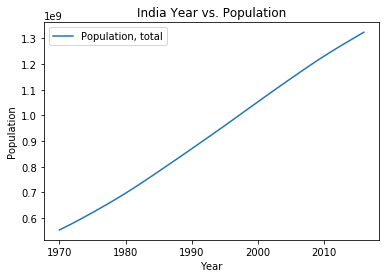

In [33]:
india_pop_age.plot("Year", "Population, total")

plt.title('India Year vs. Population')
plt.ylabel("Population")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

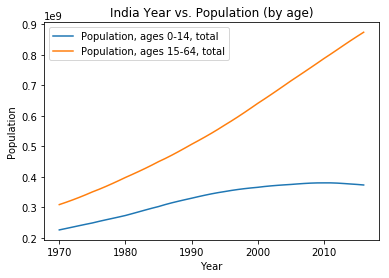

In [34]:
india_pop_age.drop(columns=["Population, total"]).plot("Year")

plt.title('India Year vs. Population (by age)')
plt.ylabel("Population")
plt.xlabel("Year")

In [41]:
india_primary_enroll = india[india['Indicator Name'] == 'Enrolment in primary education, both sexes (number)'].transpose()
#transposed to make the rows years
india_secondary_enroll = india[india['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)'].transpose()
india_tertiary_enroll = india[india['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'].transpose()
india_enroll_all_levels = india_primary_enroll.merge(india_secondary_enroll, left_index=True, right_index=True).merge(india_tertiary_enroll, left_index=True, right_index=True)

india_gdp_per_capita = india[india['Indicator Name'] == 'GDP per capita (current US$)'].transpose()

In [42]:
india_enrollment_and_gdp = india_gdp_per_capita.merge(india_enroll_all_levels, left_index=True, right_index=True)
india_enrollment_and_gdp = india_enrollment_and_gdp.rename(columns={415328: "Enrollment in primary education, both sexes (number)",
                                                                    415336: "Enrollment in secondary education, both sexes (number)",
                                                                    415349: "Enrollment in tertiary education, all programmes, both sexes (number)",
                                                                    415390: "GDP per capita (current US$)"})
india_enrollment_and_gdp = india_enrollment_and_gdp.drop(["Indicator Name"])
india_enrollment_and_gdp["Year"] = years #made year into a column
india_enrollment_and_gdp = india_enrollment_and_gdp.dropna(axis=0, how="any") #no nan
india_enrollment_and_gdp = india_enrollment_and_gdp[["Year", 
                          "GDP per capita (current US$)", 
                          "Enrollment in primary education, both sexes (number)", 
                          "Enrollment in secondary education, both sexes (number)", 
                          "Enrollment in tertiary education, all programmes, both sexes (number)"]] #made Year column first
india_enrollment_and_gdp.head()

,Year,GDP per capita (current US$),"Enrollment in primary education, both sexes (number)","Enrollment in secondary education, both sexes (number)","Enrollment in tertiary education, all programmes, both sexes (number)"
1971,1971,117.361,5.70454e+07,2.11437e+07,2.47296e+06
1973,1973,142.27,6.24006e+07,2.28236e+07,2.77315e+06
1976,1976,159.408,6.566e+07,2.51961e+07,3.04386e+06
1977,1977,184.273,6.90607e+07,2.62651e+07,3.01181e+06
1978,1978,203.559,6.7361e+07,2.71786e+07,3.16109e+06


Text(0.5, 0, 'Year')

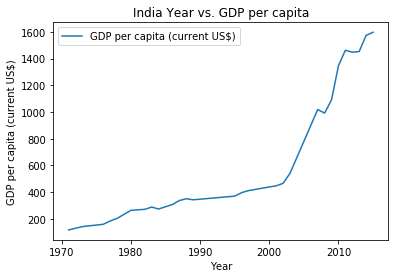

In [44]:
india_enrollment_and_gdp.plot("Year", "GDP per capita (current US$)")

plt.title('India Year vs. GDP per capita')
plt.ylabel("GDP per capita (current US$)")
plt.xlabel("Year")

Text(0.5, 0, 'GDP per capita (current US$)')

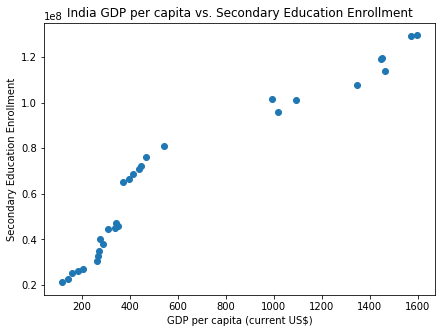

In [45]:
plt.figure(figsize=(7, 5))

plt.scatter(india_enrollment_and_gdp["GDP per capita (current US$)"],
                                    india_enrollment_and_gdp["Enrollment in secondary education, both sexes (number)"])

plt.title('India GDP per capita vs. Secondary Education Enrollment')
plt.ylabel("Secondary Education Enrollment")
plt.xlabel("GDP per capita (current US$)")

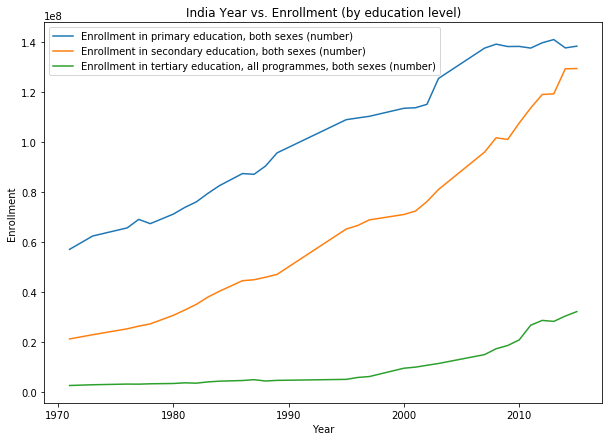

In [47]:
only_india_enrollment = india_enrollment_and_gdp.drop(columns=["GDP per capita (current US$)"])
only_india_enrollment.plot("Year", figsize=(10,7))

plt.title('India Year vs. Enrollment (by education level)')
plt.ylabel("Enrollment")
plt.xlabel("Year")
plt.legend(loc="upper left")

In [50]:
india_female_enroll = india[india['Indicator Name'] == 'Enrolment in primary education, female (number)'].transpose()

india_primary_w_female = india_primary_enroll.merge(india_female_enroll, left_index=True, right_index=True)
india_primary_w_female = india_primary_w_female.rename(columns={415328: "Enrollment in primary education, both sexes (number)", 
                                                          415329: "Enrollment in primary education, female (number)"})
india_primary_w_female = india_primary_w_female.drop(["Indicator Name"])
india_primary_w_female["Year"] = china_years
india_primary_w_female = india_primary_w_female[["Year", 
                                                 "Enrollment in primary education, both sexes (number)", 
                                                 "Enrollment in primary education, female (number)"]]
india_primary_w_female = india_primary_w_female.dropna(axis=0, how="any") #no nan

india_male_enroll = india_primary_w_female["Enrollment in primary education, both sexes (number)"] - india_primary_w_female["Enrollment in primary education, female (number)"]
india_primary_w_female["Enrollment in primary education, male (number)"] = india_male_enroll
india_primary_by_sex = india_primary_w_female

india_primary_by_sex.head()

,Year,"Enrollment in primary education, both sexes (number)","Enrollment in primary education, female (number)","Enrollment in primary education, male (number)"
1971,1971,5.70454e+07,2.13063e+07,3.57392e+07
1972,1972,5.88186e+07,2.20338e+07,3.67848e+07
1973,1973,6.24006e+07,2.3579e+07,3.88216e+07
1974,1974,6.31251e+07,2.38811e+07,3.9244e+07
1975,1975,6.48556e+07,2.45891e+07,4.02665e+07


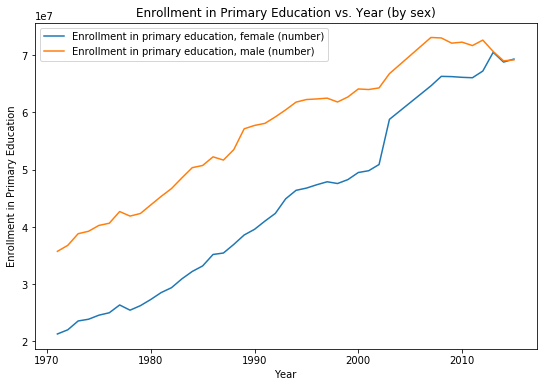

In [52]:
india_primary_by_sex.drop(columns=["Enrollment in primary education, both sexes (number)"]).plot("Year", figsize=(9,6))

plt.title('Enrollment in Primary Education vs. Year (by sex)')
plt.xlabel('Year')
plt.ylabel('Enrollment in Primary Education')
plt.legend(loc="upper left")